# **MLP Model to Predict CO2 Emission from Cars in Canada**

In [1]:
import pandas as pd
import numpy as np


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder


from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


import matplotlib.pyplot as plt
import seaborn as sns


import random


## **Pre Porcessing Data**

In [2]:
#importing data
data = pd.read_csv('CO2.csv')

#target encode vehicle 'Make'
make_means = data.groupby('Make')['CO2 Emissions(g/km)'].mean()
data['Make_encoded'] = data['Make'].map(make_means)
data.drop(columns = ['Make'], inplace = True)

#One-hot encode 'Model','Transmission', 'Fuel Type', and 'Vehicle Class'
data = pd.get_dummies(data, columns=['Model','Transmission', 'Fuel Type', 'Vehicle Class'], drop_first=True)



print(data.head(5))



   Engine Size(L)  Cylinders  Fuel Consumption City (L/100 km)  \
0             2.0          4                               9.9   
1             2.4          4                              11.2   
2             1.5          4                               6.0   
3             3.5          6                              12.7   
4             3.5          6                              12.1   

   Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                              6.7                               8.5   
1                              7.7                               9.6   
2                              5.8                               5.9   
3                              9.1                              11.1   
4                              8.7                              10.6   

   Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  Make_encoded  \
0                           33                  196    223.652778   
1                           29  

In [3]:
# Define features and target
X = data.drop('CO2 Emissions(g/km)', axis=1)
y = data['CO2 Emissions(g/km)']

# Scale numerical features
numerical_cols = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption Comb (L/100 km)', 'Make_encoded']
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Building MLP Model**

In [4]:
# Define the MLP model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # First hidden layer
    Dense(64, activation='relu'),                                  # Second hidden layer
    Dense(32, activation='relu'),                                  # Third hidden layer
    Dense(1)                                                       # Output layer (regression)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Summary of the model
model.summary()

c:\Users\ayoos\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       269,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 279,809 (1.07 MB)

 Trainable params: 279,809 (1.07 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,  # Use 20% of training data for validation
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 40535.4727 - mae: 173.2151 - val_loss: 818.8327 - val_mae: 20.6867
Epoch 2/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 638.9808 - mae: 17.9058 - val_loss: 373.1704 - val_mae: 12.9688
Epoch 3/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 353.1382 - mae: 12.4632 - val_loss: 226.6174 - val_mae: 9.9437
Epoch 4/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 195.7310 - mae: 9.2351 - val_loss: 153.1032 - val_mae: 8.1076
Epoch 5/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 117.3277 - mae: 7.2545 - val_loss: 101.5598 - val_mae: 6.2532
Epoch 6/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 70.2689 - mae: 5.3962 - val_loss: 67.7444 - val_mae: 5.2647
Epoch 7/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 45.6594 - mae: 4.2488 - val_loss: 53.4515 - val_mae: 4.5523
Epoch 8/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 34.1611 - mae: 3.5904 - val_loss: 46.9109 - val_mae: 4.1855
Epoch 9/100
14

## **Model Results and Evaluation**

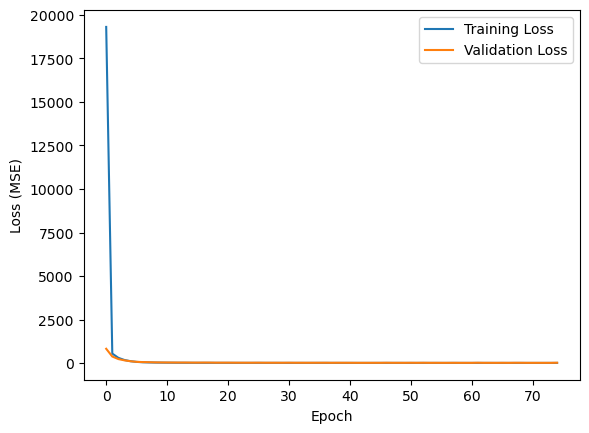

In [6]:
# Plot training and validation loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Test MSE: 17.03
Test MAE: 2.47 g/km
Test R²: 0.9950


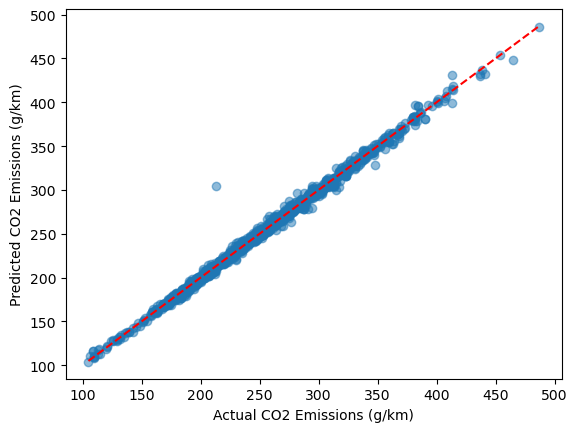

In [7]:
# Predict on test set
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {mse:.2f}")
print(f"Test MAE: {mae:.2f} g/km")
print(f"Test R²: {r2:.4f}")

#Scatter plot of predicted vs. actual values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual CO2 Emissions (g/km)')
plt.ylabel('Predicted CO2 Emissions (g/km)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.show()

In [8]:
#cross validation (4 minutes running time)
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mse_scores, mae_scores, r2_scores = [], [], []
for train_idx, test_idx in kf.split(X):
    X_train_cv, X_test_cv = X.iloc[train_idx], X.iloc[test_idx]
    y_train_cv, y_test_cv = y.iloc[train_idx], y.iloc[test_idx]
    model.fit(X_train_cv, y_train_cv, epochs=100, batch_size=32, verbose=0)
    y_pred_cv = model.predict(X_test_cv)
    mse_scores.append(mean_squared_error(y_test_cv, y_pred_cv))
    mae_scores.append(mean_absolute_error(y_test_cv, y_pred_cv))
    r2_scores.append(r2_score(y_test_cv, y_pred_cv))
print(f"Cross-Validation MSE: {np.mean(mse_scores):.2f} ± {np.std(mse_scores):.2f}")
print(f"Cross-Validation MAE: {np.mean(mae_scores):.2f} ± {np.std(mae_scores):.2f}")
print(f"Cross-Validation R²: {np.mean(r2_scores):.4f} ± {np.std(r2_scores):.4f}")

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Cross-Validation MSE: 8.38 ± 3.98
Cross-Validation MAE: 1.91 ± 0.23
Cross-Validation R²: 0.9976 ± 0.0012


**Feature Importance Using Random Regressor Forest**

Top 10 Most Important Features:
Fuel Consumption Comb (L/100 km)         0.932790
Fuel Type_E                              0.048385
Engine Size(L)                           0.010027
Cylinders                                0.002341
Make_encoded                             0.001188
Vehicle Class_PICKUP TRUCK - STANDARD    0.001076
Fuel Type_X                              0.000885
Vehicle Class_PICKUP TRUCK - SMALL       0.000776
Vehicle Class_SUV - STANDARD             0.000503
Transmission_AS8                         0.000417
dtype: float64


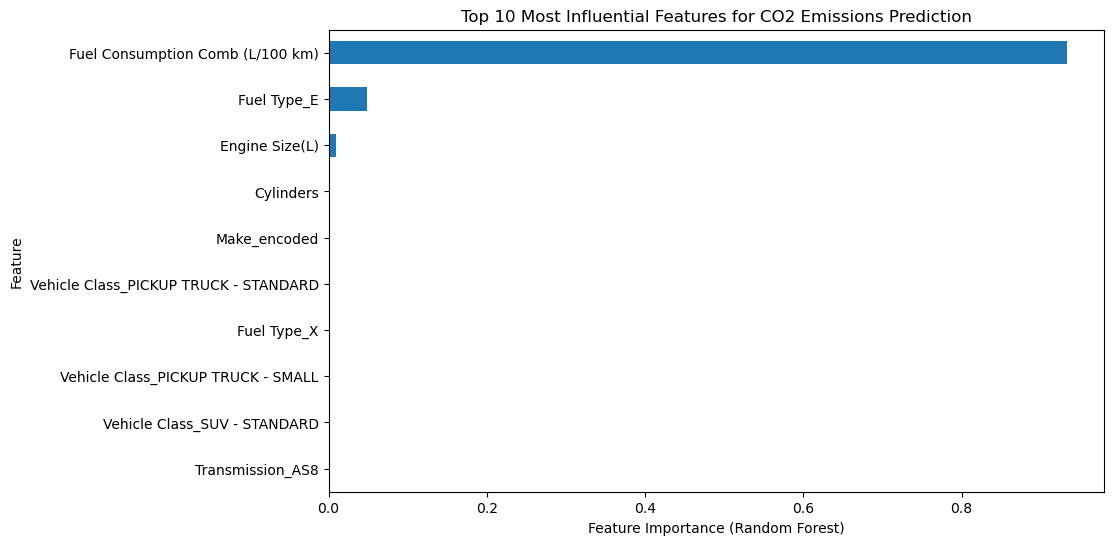

In [14]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load and preprocess data (using 'data' instead of 'df')
data = pd.read_csv("CO2.csv")
data.drop(['Model', 'Fuel Consumption City (L/100 km)', 
           'Fuel Consumption Hwy (L/100 km)', 
           'Fuel Consumption Comb (mpg)'], axis=1, inplace=True)
data.fillna(data.median(numeric_only=True), inplace=True)
data.fillna(data.mode().iloc[0], inplace=True)
make_means = data.groupby('Make')['CO2 Emissions(g/km)'].mean()
data['Make_encoded'] = data['Make'].map(make_means)
data.drop('Make', axis=1, inplace=True)
data = pd.get_dummies(data, columns=['Transmission', 'Fuel Type', 'Vehicle Class'], drop_first=True)
X = data.drop('CO2 Emissions(g/km)', axis=1).astype(np.float32)
y = data['CO2 Emissions(g/km)'].astype(np.float32)
numerical_cols = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption Comb (L/100 km)', 'Make_encoded']
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Display top 10 most important features
print("Top 10 Most Important Features:")
print(importances.head(10))

# Plot the top 10 features
plt.figure(figsize=(10, 6))
importances.head(10).plot(kind='barh')
plt.xlabel('Feature Importance (Random Forest)')
plt.ylabel('Feature')
plt.title('Top 10 Most Influential Features for CO2 Emissions Prediction')
plt.gca().invert_yaxis()
plt.show()